In [1]:
%matplotlib inline

import numpy as np

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from time import sleep

In [2]:
def generate_random_data(n, x_from, x_to, y_from, y_to):
    return [np.array([np.random.uniform(x_from, x_to), np.random.uniform(y_from, y_to)]) for i in range(n)]

In [3]:
def generate_n_initial_centroids(data, n):
    min_x = min([x[0] for x in data])
    max_x = max([x[0] for x in data])
    min_y = min([x[1] for x in data])
    max_y = max([x[1] for x in data])
    return [np.array((np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))) for i in range(n)]    

In [4]:
def plot_initial_data(data):
    [plt.scatter(x[0], x[1], color='black') for x in data]

In [5]:
def group_data(data, centroids):
    grouping = {tuple(c): [] for c in centroids}
    for x in data:
        distances = {np.linalg.norm(centroid - x): tuple(centroid) for centroid in centroids}
        grouping[distances[min(distances.keys())]].append(x)
    return grouping

In [6]:
def calculate_new_centroids(groups):
    new_centroids = []
    for group in groups.values():
        avg_x = np.average([x[0] for x in group])
        if not avg_x: avg_x = None
        avg_y = np.average([x[1] for x in group])
        if not avg_y: avg_y = None
        new_centroids.append(np.array([avg_x, avg_y]))
    return new_centroids

In [7]:
def plot_current_groups(groups):
    colors = cm.rainbow(np.linspace(0, 1, len(groups)))
    fig, ax = plt.subplots()
    for centroid, color in zip(groups, colors):
        for data_point in groups[centroid]:
            plt.scatter(data_point[0], data_point[1], color=color)
        plt.scatter(centroid[0], centroid[1], color=color, marker = 's', s = 80, edgecolors = 'black')

In [8]:
def k_means(data, n_clusters, iterations):
    centroids = generate_n_initial_centroids(data, n_clusters)
    plt.show()
    plot_initial_data(data)
    for i in range(iterations):
        groups = group_data(data, centroids)
        plot_current_groups(groups)
        plt.show()
        plt.pause(0.01)
        centroids = calculate_new_centroids(groups)
    return groups

In [9]:
data = generate_random_data(100, 0, 20, 0, 20)

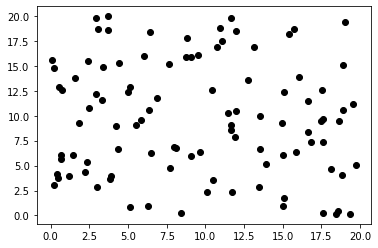

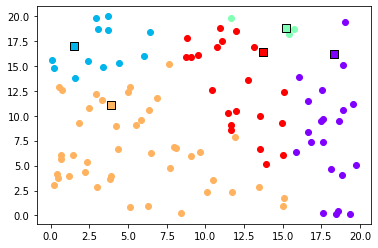

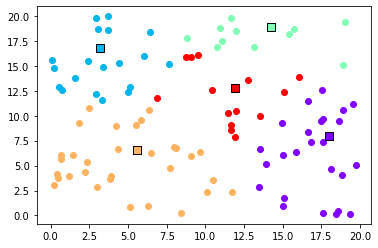

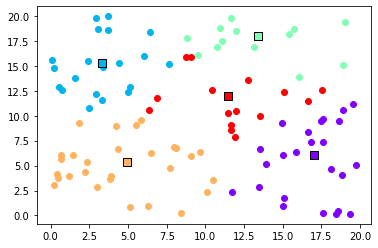

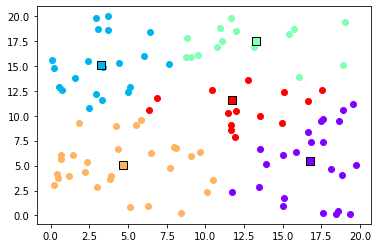

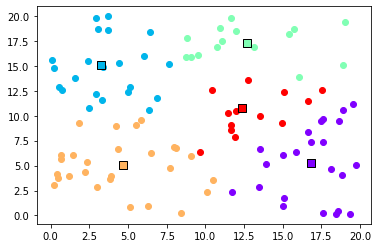

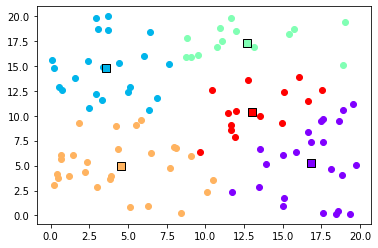

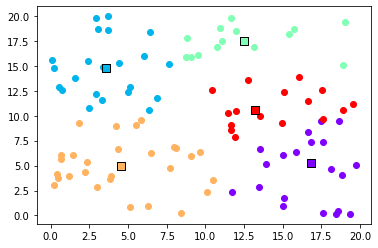

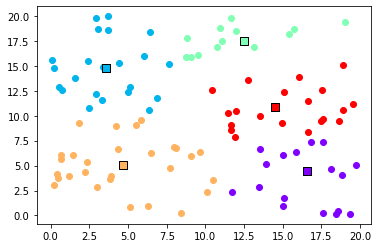

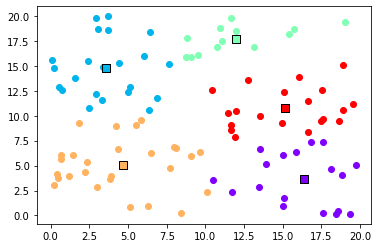

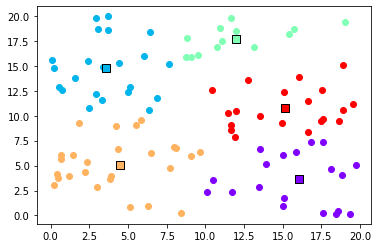

In [10]:
groups = k_means(data, 5, 10)

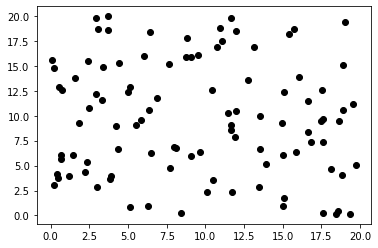

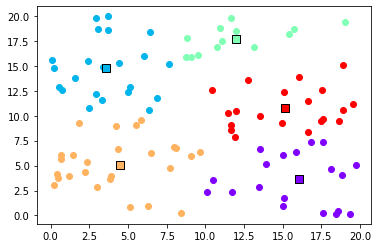

In [11]:
plot_initial_data(data)
plot_current_groups(groups)